In [2]:
import numpy as np
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Appsquadz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Appsquadz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Appsquadz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Appsquadz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


Accuracy: 0.646827014540019


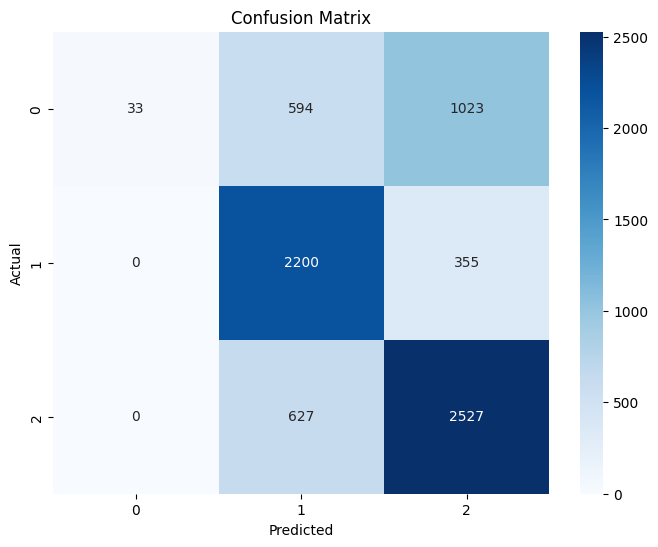

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df = df[~(df['clean_comment'].str.strip() == '')]
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
# Define the preprocessing function
def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()

    # Remove trailing and leading whitespaces
    comment = comment.strip()

    # Remove newline characters
    comment = re.sub(r'\n', ' ', comment)

    # Remove non-alphanumeric characters, except punctuation
    comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)

    # Remove stopwords but retain important ones for sentiment analysis
    stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

    return comment
# Apply the preprocessing function to the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].apply(preprocess_comment)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
vectorizer = CountVectorizer(max_features=4000)
X = vectorizer.fit_transform(df['clean_comment']).toarray()
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Log Random Forest parameters
n_estimators = 100
max_depth = 15

# Initialize and train the model
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Log metrics for each class and accuracy
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred, output_dict=True)


# Confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Display final accuracy
print(f"Accuracy: {accuracy}")

In [6]:
classification_rep

{'-1': {'precision': 1.0,
  'recall': 0.02,
  'f1-score': 0.0392156862745098,
  'support': 1650.0},
 '0': {'precision': 0.6430868167202572,
  'recall': 0.8610567514677103,
  'f1-score': 0.7362784471218207,
  'support': 2555.0},
 '1': {'precision': 0.6471190781049936,
  'recall': 0.8012048192771084,
  'f1-score': 0.7159654341974784,
  'support': 3154.0},
 'accuracy': 0.646827014540019,
 'macro avg': {'precision': 0.7634019649417502,
  'recall': 0.5607538569149396,
  'f1-score': 0.4971531891979362,
  'support': 7359.0},
 'weighted avg': {'precision': 0.7248403844358482,
  'recall': 0.646827014540019,
  'f1-score': 0.5712803769816606,
  'support': 7359.0}}